avant (60000, 28, 28)
avant (60000,)
avant (10000, 28, 28)
avant (10000,)
(6000, 28, 28)
(1000, 28, 28)
(6000,)


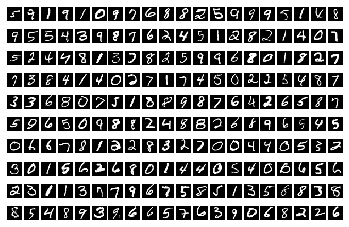

Apres (6000, 28, 28, 1)
Apres (1000, 28, 28, 1)
(6000, 10)
(1000, 10)


In [20]:
# Import libraries and modules 
# Import libraries and modules 
import numpy as np 
import time 
np.random.seed(123) 
# for reproducibility

from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix

import tensorflow as tf 
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import Conv2DTranspose, Reshape, Dense, Activation, Flatten, Dropout, Convolution2D, MaxPooling2D, Input 
from utilitaire import affiche

"""
- train_test_split: (répartir les données aléatoiremement, test_size= nb) avec nb [0,1] (return 1-nb% de de la taille d'entrée)
- confusion_matrix: calcule la matrice de confusion
- Sequential : 






"""

################################################## 
# I - Load pre-shuffled MNIST data train and test sets
################################################## 
from tensorflow.keras.datasets.mnist import load_data 
from matplotlib import pyplot 

# load dataset 
(X_train, y_train), (X_test, y_test) = load_data() 
print("avant",X_train.shape)
print("avant",y_train.shape)
print("avant",X_test.shape)
print("avant",y_test.shape)

X_train, pipo, y_train, pipo = train_test_split(X_train, y_train, test_size=0.9) 
X_test, pipo, y_test, pipo = train_test_split(X_test, y_test, test_size=0.9) 

# reponses
print(X_train.shape) # 6000 images d'apprentissage
print(X_test.shape)  # 1000 images de test
print(y_train.shape) # y_train (6000,1)
# la taille des images 28*28
# il y a 10 classes d'images

for i in range(200): 
    plt.subplot(10,20,i+1)
    plt.imshow(X_train[i,:].reshape([28,28]), cmap='gray') 
    plt.axis('off') 
plt.show() 

# Preprocess input data 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1) 
X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train /= 255 
X_test /= 255 
print("Apres",X_train.shape)
print("Apres",X_test.shape)

# le pretraitement des données sert à ?????

# Preprocess class labels 
Y_train = tf.keras.utils.to_categorical(y_train, 10)
print(Y_train.shape)  # Y_train (6000,10) 6000 echantillons et 10 classes
Y_test = tf.keras.utils.to_categorical(y_test, 10)

# tf.keras.utils.to_categorical Converts a class vector (integers) to binary class matrix 
print(Y_test.shape)

#pourquoi on utilise le prétraitement des données: 

"""Une fois les données réunies et labellisées il va falloir les préparer pour une utilisation par le réseau de neurone.

La première chose a faire est de réduire leur taille. En effet nous sommes habitués à faire des photos en plusieurs millions de pixel, or pour conserver des temps de traitement réaliste, il faut se limiter a des images les plus petites possibles. Par exemple 28×28 pixels pour le jeux de données MNIST. On ne dépasse normalement pas 256×256, soit 0,06 millions de pixels !

L’autre traitement qui peut beaucoup améliorer la rapidité du traitement est de passer les photos en noir et blanc. Ceci divise la complexité par 3 puisqu’il n’y a plus qu’une information de ‘couleur’ (on parle de canaux) au lieu de 3.

Dans le cas de tableau de données, pour de la détection de fraudes par exemple, il faut convertir chaque information en données numérique. En effet les neurones ne traite que des nombres. Il existe des algorithmes pour effectuer cette transformation sans perdre la signification de la donnée initiales.

Il est aussi possible de réduire les données sans trop perdre en précision. Par exemple avec des algorithmes de réduction dimensionnelle tel que l’Analyse par Composante principale.

Ensuite arrivent les traitements destine à améliorer la pertinence. On va par exemple augmenter le contraste de l’image. Ceci afin de faciliter la découverte des zones d’intérêts par le réseau.
"""


In [21]:
def affiche(history): 
  # summarize history for accuracy 
  plt.plot(history.history['acc']) 
  plt.plot(history.history['val_acc']) 
  plt.title('model accuracy') 
  plt.ylabel('accuracy') 
  plt.xlabel('epoch') 
  plt.legend(['train', 'test'], loc='upper left')
  plt.show() 
  # summarize history for loss 
  plt.plot(history.history['loss']) 
  plt.plot(history.history['val_loss']) 
  plt.title('model loss') 
  plt.ylabel('loss') 
  plt.xlabel('epoch') 
  plt.legend(['train', 'test'], loc='upper left') 
  plt.show()

In [25]:
inputs = Input(shape=(28,28,1)) 
x = inputs 
print(x.shape) #(None,28,28,1)
x=Flatten()(x) 
print(x.shape) #(None,784)
# flatten -> on passe d'une image 2D 28.28 à une image 1D (vecteur) 784

outputs=Dense(10, activation='softmax')(x)  # declaration d'une couche Dense( nbr_neurones, activation_fct)
model = Model(inputs, outputs) 
model.summary()

# on utilise la fonction softmax prcq on a 10 classes donc on aura 10 neurones de sortie, softmax est utilisé pour
# de la multi-classification en couche de sortie
# fct d'activation: Elle va permettre le passage d’information ou non de l’information si le seuil de stimulation 
# est atteint. Concrètement, elle va avoir pour rôle de décider si on active ou non une réponse du neurone

# y= w.x+b, x=28*28 , on a 10 neurones de sorties-> le nombre de parametres a determiner est 28.28.10+10

# a voir: model zoo, yolo, tensorboard, distill.pub->momentum??

(None, 28, 28, 1)
(None, 784)
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


ipykernel_launcher:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
Epoch 1/10
24/24 [==============================] - 1s 14ms/step - loss: 1.6679 - accuracy: 0.4998 - val_loss: 0.8123 - val_accuracy: 0.8360
Epoch 2/10
24/24 [==============================] - 1s 44ms/step - loss: 0.7543 - accuracy: 0.8281 - val_loss: 0.6276 - val_accuracy: 0.8600
Epoch 3/10
24/24 [==============================] - 0s 7ms/step - loss: 0.5905 - accuracy: 0.8621 - val_loss: 0.5456 - val_accuracy: 0.8640
Epoch 4/10
24/24 [==============================] - 0s 6ms/step - loss: 0.5338 - accuracy: 0.8738 - val_loss: 0.5026 - val_accuracy: 0.8680
Epoch 5/10
24/24 [==============================] - 0s 6ms/step - loss: 0.4864 - accuracy: 0.8800 - val_loss: 0.4766 - val_accuracy: 0.8720
Epoch 6/10
24/24 [==============================] - 0s 6ms/step - loss: 0.4600 - accuracy: 0.8866 - val_loss: 0.4529 - val

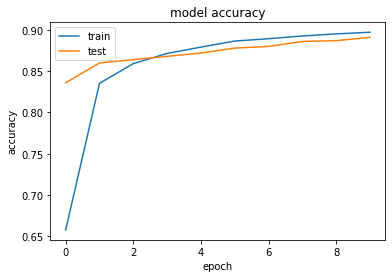

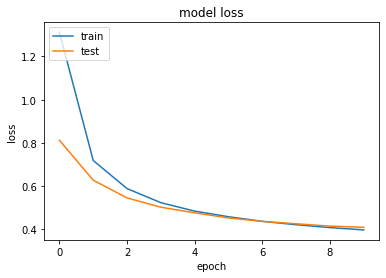

lr= 0.2 batch_size= 256 epochs= 10
Temps d apprentissage 3.281983000000025


In [28]:
lr= 0.2  # entre 10^(-2) et 1 , learning rate: paramètre de réglage dans un algorithme d'optimisation qui détermine 
         # la taille du pas à chaque itération tout en se déplaçant vers un minimum d'une fonction de perte

batch_size=256 # sous ensemble de la base d'apprentissage
epochs=10      # nombre de fois que tous les exemples sont vus en apprentissage

sgd1= tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.0) 

model.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy']) 
# categorical_crossentropy :is a loss function that is used in multi-class classification tasks. These are tasks where
# an example can only belong to one out of many possible categories, and the model must decide which one

tps1 = time.clock() 
history =model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,verbose=1,validation_data=(X_test, Y_test)) 
# model.fit pour l'apprentissage de notre model
tps2 = time.clock() 

from utilitaire import affiche 

affiche(history) #donnee en annexe 
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs) 
print('Temps d apprentissage',tps2 - tps1)

In [29]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]*100) 
y_pred = model.predict(X_test) # donne toutes les probabilités d'appartenir à chaque classe 
print(y_pred[1,:])
y_pred = y_pred.argmax(axis=-1) # donne la classe avec la plus grande probabilité
print(y_pred[1])
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Test loss: 0.4093848466873169
Test accuracy: 89.0999972820282
[1.1533853e-02 1.3394834e-04 8.7327801e-04 4.5080277e-01 4.4227289e-03
 4.8447785e-01 2.4123726e-02 3.0808679e-03 1.7029477e-02 3.5215383e-03]
5
Confusion Matrix
[[ 84   0   1   0   0   0   0   0   0   0]
 [  0 108   0   2   0   0   1   0   2   0]
 [  0   2  91   0   4   0   3   2   5   0]
 [  0   0   2  84   0  10   1   1   3   0]
 [  0   0   1   0  88   0   1   0   2   4]
 [  0   2   0   3   0  71   1   3   6   2]
 [  2   1   0   0   1   2  99   1   0   0]
 [  0   1   3   0   1   0   0  96   2   3]
 [  0   1   1   3   2   1   0   1  82   1]
 [  2   2   0   0   8   1   0   5   0  88]]


# MLP:


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
ipykernel_launcher:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
24/24 [==============================] - 1s 16ms/step - loss: 1.

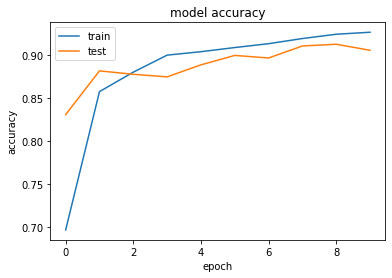

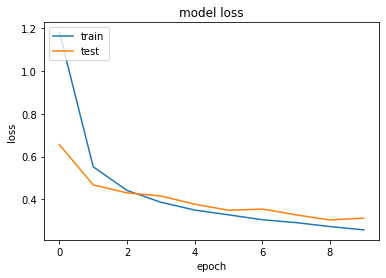

lr= 0.2 batch_size= 256 epochs= 10
Temps d apprentissage 4.623200000000001


In [10]:
# ajouter une couche caché
couche_1=Dense(256,activation='relu')(x)
out=Dense(10, activation='softmax')(couche_1)

new_model = Model(inputs=model.input, outputs=out)
new_model.summary()

new_model.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy'])

tps1 = time.clock()
history =new_model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,verbose=1,validation_data=(X_test, Y_test))
tps2 = time.clock() 

affiche(history) #donnee en annexe 
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs) 
print('Temps d apprentissage',tps2 - tps1)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
ipykernel_launcher:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed 

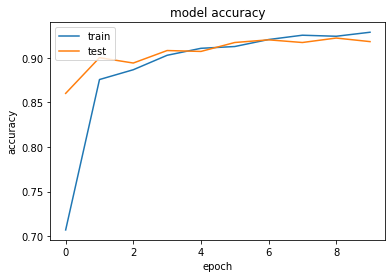

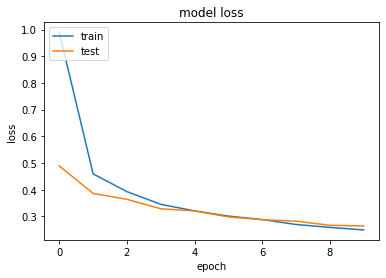

lr= 0.2 batch_size= 256 epochs= 10
Temps d apprentissage 4.534223999999998


In [11]:
# ajouter une couche dropout
drop=Dropout(0.25)(couche_1)
out_1=Dense(10, activation='softmax')(drop)

new_model_1 = Model(inputs=model.input, outputs=out_1)
new_model_1.summary()

new_model_1.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy'])

tps1 = time.clock()
history =new_model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,verbose=1,validation_data=(X_test, Y_test))
tps2 = time.clock() 

affiche(history) #donnee en annexe 
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs) 
print('Temps d apprentissage',tps2 - tps1)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_____________________________________________________

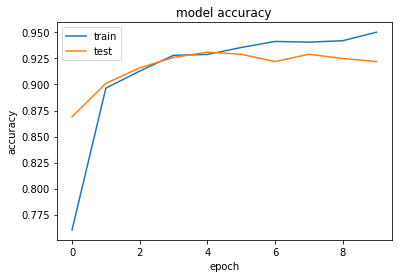

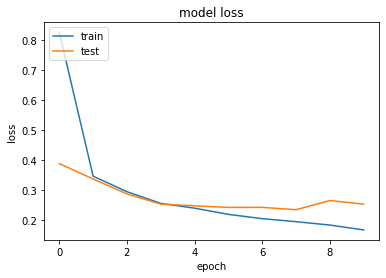

lr= 0.2 batch_size= 256 epochs= 10
Temps d apprentissage 5.359311000000002


In [12]:
# ajouter une deuxième couche 
couche_2=Dense(256, activation='relu')(drop) # le dropout pour minimiser l'overfitting
out_2=Dense(10, activation='softmax')(couche_2)

new_model_2 = Model(inputs=model.input, outputs=out_2)
new_model_2.summary()

new_model_2.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy'])

tps1 = time.clock()
history =new_model_2.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,verbose=1,validation_data=(X_test, Y_test))
tps2 = time.clock() 

affiche(history) #donnee en annexe 
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs) 
print('Temps d apprentissage',tps2 - tps1)

In [13]:
# CNN , ajout de couche convolutionnelle
# rmq: la convolution se fait pour des entree 2d donc ajouter l'instruction avant le flatten!

inputs = Input(shape=(28,28,1)) 
x = inputs 
x=Convolution2D(32,(3,3),activation='relu',padding='same')(x)
x=Convolution2D(64,(3,3),activation='relu',padding='same')(x)
x=MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x)
x=Flatten()(x) 

couche1=Dense(256,activation='relu')(x)
drop=Dropout(0.25)(couche1)
couche2=Dense(256, activation='relu')(drop)

outputs=Dense(10, activation='softmax')(couche2)  # declaration d'une couche Dense( nbr_neurones, activation_fct)

model = Model(inputs, outputs) 
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy'])

tps1 = time.clock()
history =model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,verbose=1,validation_data=(X_test, Y_test))
tps2 = time.clock() 

affiche(history) #donnee en annexe 
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs) 
print('Temps d apprentissage',tps2 - tps1)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               3211520   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0   

KeyboardInterrupt: 